# Machine Learning with SKLearn
Justin Hardy
<br/>
## Library Imports

In [519]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sb
import tensorflow as tf
import keras

from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SimpleRNN
from keras.optimizers import RMSprop

# Seed
np.random.seed(1234)

## Loading the Data Set
The below code loads the data set given to us, which is simply an automobile data set that can be used to predict miles per galon (mpg).

In [520]:
# Load data set
Data = pd.read_csv('Auto.csv');
print( Data.head(), '\n' )
print("Dimensions:", Data.shape)

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino   

Dimensions: (392, 9)


## Correcting Data Types
The code below prints a description of each column in the data set.

In [521]:
# Describe MPG
Data.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

Based off of the output above, We can observe that the MPG's range is between 9.0 - 46.6, and that its average is roughly. 23.45.

In [522]:
# Describe Weight
Data.weight.describe()

count     392.000000
mean     2977.584184
std       849.402560
min      1613.000000
25%      2225.250000
50%      2803.500000
75%      3614.750000
max      5140.000000
Name: weight, dtype: float64

Likewise for our Weight column, its range is between 1613.0 - 5140.0, and its average is roughly 2977.58.

In [523]:
# Describe Year
Data.year.describe()

count    390.000000
mean      76.010256
std        3.668093
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: year, dtype: float64

And finally for our Year column, its range is between 70.0 - 82.0, and its average is roughly 76.01.

The output below shows each of the columns' data types. As you can see, some data best represented categorically is being represented as an integer.

In [524]:
# Check the data types of the columns
Data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object

We'll go ahead and convert those columns - cylinders and origin - to categorical data types. The output below shows the changes being made, with the categorical columns now being of type int8 instead of type int64.

In [525]:
# Change categorical data to categorical types
Data.cylinders = Data.cylinders.astype('category').cat.codes
Data.origin = Data.origin.astype('category').cat.codes

# Verify changes
Data.dtypes

mpg             float64
cylinders          int8
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin             int8
name             object
dtype: object

## Dealing with NAs
Next, we'll remove any NA rows from our data frame. It's relatively simple in Python, as shown below.

In [526]:
Data = Data.dropna()
print('Dimensions:', Data.shape)

Dimensions: (389, 9)


## Modifying Columns
Since we're using this data set for classification, we'll want to set up a column to be used that will classify the mpg by whether or not it is greater than the average. Those greater than the average will be considered 'high'.

In [527]:
# Create & add mpg_high column
Data['mpg_high'] = Data.mpg.apply(lambda x: 1 if x > np.mean(Data.mpg) else 0)
Data.mpg_high = Data.mpg_high.astype('category').cat.codes

# Delete the mpg and name columns
Data = Data.drop(columns=['mpg', 'name'])

# Output first few rows of our newly modified data frame
Data.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_high
0,4,307.0,130,3504,12.0,70.0,0,0
1,4,350.0,165,3693,11.5,70.0,0,0
2,4,318.0,150,3436,11.0,70.0,0,0
3,4,304.0,150,3433,12.0,70.0,0,0
6,4,454.0,220,4354,9.0,70.0,0,0


## Data Exploration (w/ Graphs)
Now we'll explore the data by creating graphs, and seeing what we can learn about the data from these graphs.

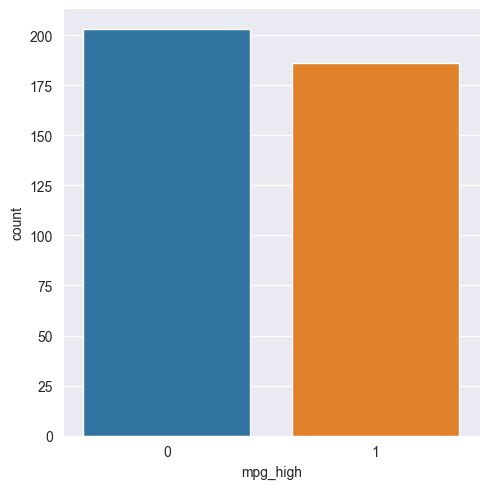

In [528]:
# Seaborn catplot; mpg_high
sb.catplot(data=Data, x='mpg_high', kind='count')

The above graph simply tells us that the number of vehicles that fall above the average is somewhat notably lower than those that do not. For the most part, we can observe that the data is relatively balanced.

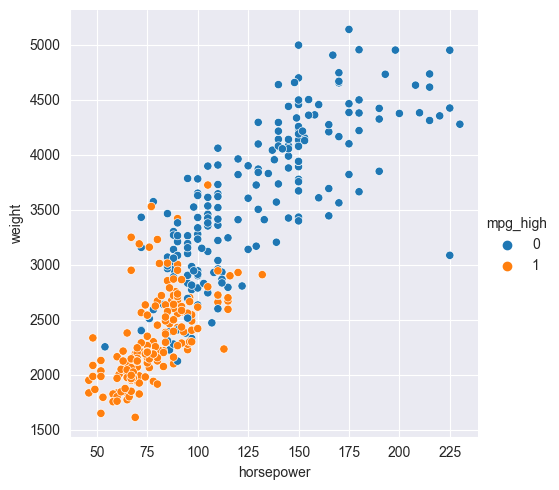

In [529]:
# Seaborn relplot; x=horsepower, y=weight, hue/style=mpg_high
sb.relplot(data=Data, x='horsepower', y='weight', hue='mpg_high')

The above graph tells us that vehicles with low weight and horsepower tend to have high mpg rates, while those with high horsepower or high weight tend to have low mpg rates. This is clear by the fact that the data clusters up into the bottom-left most portion of the graph, in the lower ends of both values, with some outliers. This doesn't seem to be the case for all vehicles with low weight and horsepower, however, as there are a number of blue dots that fall below the average that lie within this cluster. It does seem though that weight and horsepower are rather linearly related.

<AxesSubplot: xlabel='mpg_high', ylabel='weight'>

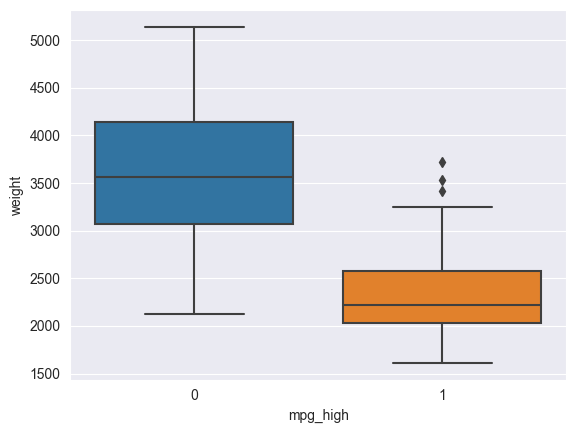

In [530]:
# Seaborn boxplot; x=mpg_high, y=weight
sb.boxplot(data=Data, x='mpg_high', y='weight')

The above graph tells us that vehicles with lower weights tend to have high mpg rates, while vehicles with higher weights tend to have lower mpg rates. The relationship between mpg and weight seems to be inverse.

## Train/Test Split
Now, we'll split the data to train/test in preparation for the machine learning algorithms. We'll give it seed 1234 so that we'll always get the same results.

In [531]:
# Split train/test
x = Data.iloc[:, 0:7]
y = Data.mpg_high
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=1234)

# Output dimensions
print('Train shape:', x_train.shape)
print('Test shape:', x_test.shape)

Train shape: (311, 7)
Test shape: (78, 7)


## Model Training & Prediction
Now we can finally start performing machine learning on the data using a variety of models! Specifically, we'll use the Logistic Regression, Decision Tree, and the newly covered Neural Network algorithms and experiment with their outputs.

### Logistic Regression
DESCRIPTION

In [532]:
# Train model
lrm = LogisticRegression(max_iter=1000)
lrm.fit(x_train, y_train)

# Make predictions
pred_lrm = lrm.predict(x_test)

# Evaluate predictions
print('Accuracy:', accuracy_score(y_test, pred_lrm))
confusion_matrix(y_test, pred_lrm)

Accuracy: 0.8974358974358975


array([[42,  8],
       [ 0, 28]], dtype=int64)

ANALYSIS

### Decision Tree
DESCRIPTION

In [533]:
# Train model
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

# Make predictions
pred_dt = dt.predict(x_test)

# Evaluate predictions
print('Accuracy:', accuracy_score(y_test, pred_dt))
print('Precision:', precision_score(y_test, pred_dt))
print('Recall:', recall_score(y_test, pred_dt))
print('F1:', f1_score(y_test, pred_dt))

Accuracy: 0.9230769230769231
Precision: 0.8666666666666667
Recall: 0.9285714285714286
F1: 0.896551724137931


ANALYSIS

### Neural Network
DESCRIPTION

In [534]:
# Convert class vectors to binary class matrices
y_train_m = keras.utils.to_categorical(y_train, 2)
y_test_m = keras.utils.to_categorical(y_test, 2)

# Specify NN settings
batch_size = 128
epochs = 100

# Create NN
nn1 = Sequential()
nn1.add(Dense(512, activation='relu', input_shape=(7,)))
nn1.add(Dropout(0.2))
nn1.add(Dense(2, activation='sigmoid'))

# Make predictons
nn1.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
nn1_history = nn1.fit(x_train, y_train_m, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test_m))

# Evaluate predictions
nn1_score = nn1.evaluate(x_test, y_test_m, verbose=0)
print('Test Loss:', nn1_score[0])
print('Test Accuracy:', nn1_score[1])

Epoch 1/100
3/3 [==============================] - 1s 128ms/step - loss: 67.3620 - accuracy: 0.4855 - val_loss: 14.5814 - val_accuracy: 0.3590
Epoch 2/100
3/3 [==============================] - 0s 27ms/step - loss: 41.1449 - accuracy: 0.4984 - val_loss: 17.0111 - val_accuracy: 0.6410
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 37.5000 - accuracy: 0.4855 - val_loss: 8.6718 - val_accuracy: 0.6410
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 36.1307 - accuracy: 0.5370 - val_loss: 18.7207 - val_accuracy: 0.6410
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 34.6596 - accuracy: 0.5113 - val_loss: 24.7716 - val_accuracy: 0.3590
Epoch 6/100
3/3 [==============================] - 0s 24ms/step - loss: 34.9884 - accuracy: 0.5241 - val_loss: 18.3547 - val_accuracy: 0.6410
Epoch 7/100
3/3 [==============================] - 0s 20ms/step - loss: 35.3896 - accuracy: 0.4984 - val_loss: 6.1705 - val_accuracy: 0.3718
Epoch 8

ANALYSIS

SEGUE

In [535]:
# Specify more NN settings
max_features = 10000

# Create another NN
nn2 = Sequential()
nn2.add(Embedding(max_features, batch_size))
nn2.add(SimpleRNN(batch_size))
nn2.add(Dense(2, activation='sigmoid'))

# Make predictons
nn2.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
nn2_history = nn2.fit(x_train, y_train_m, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test_m))

# Evaluate predictions
nn2_score = nn2.evaluate(x_test, y_test_m, verbose=0)
print('Test Loss:', nn2_score[0])
print('Test Accuracy:', nn2_score[1])

Epoch 1/100
3/3 [==============================] - 2s 198ms/step - loss: 0.6002 - accuracy: 0.7653 - val_loss: 0.3664 - val_accuracy: 0.8590
Epoch 2/100
3/3 [==============================] - 0s 27ms/step - loss: 0.2852 - accuracy: 0.9035 - val_loss: 0.3568 - val_accuracy: 0.8590
Epoch 3/100
3/3 [==============================] - 0s 29ms/step - loss: 0.2115 - accuracy: 0.9035 - val_loss: 0.3026 - val_accuracy: 0.8590
Epoch 4/100
3/3 [==============================] - 0s 31ms/step - loss: 0.1526 - accuracy: 0.9293 - val_loss: 0.2690 - val_accuracy: 0.8846
Epoch 5/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0989 - accuracy: 0.9646 - val_loss: 0.2738 - val_accuracy: 0.8974
Epoch 6/100
3/3 [==============================] - 0s 35ms/step - loss: 0.0592 - accuracy: 0.9807 - val_loss: 0.3299 - val_accuracy: 0.8846
Epoch 7/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0416 - accuracy: 0.9936 - val_loss: 0.3391 - val_accuracy: 0.8974
Epoch 8/100
3/3 [==

ANALYSIS